## INVESTIGATION OF TITANC DATA SET

### INTRODUCTION

For this project we will look at a data set containing the passenger details for the Titanic which met with its unfortunate fate on April 15, 1912. 

Here we will go through all the steps of data analysis like data wrangling, exploration and visualization in order to answer some questions that have been raised below:

#### QUESTIONS:
1. Does gender have any relation to survival rate?
2. Does socio-economic status defined by passenger class or rate of ticket or cabin have any correlation to survival rate?
3. Is port of embarkment significant?
4. Does age become a contributing factor to survival?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### DATA OVERVIEW

Let us start by importing the data from a csv file, using the pandas library, and take a look at the data.

In [116]:
filename = 'Titanic_data.csv'
titanic = pd.read_csv(filename)

In [117]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data contains the following information:
1. Passenger Id
2. Survived or not
3. Passenger class
4. Age
5. Siblings or spouses
6. Parents or children
7. Fare
8. Ticket no
9. Gender
10. Cabin
11. Passenger Name
12. Embarking port

We are interested in the factors that might have influeced in the survival of a passenger. So, let us first look at the number of survivors and number of passengers and crew combined.

In [119]:
#total passengers
len(titanic)

891

In [120]:
# total surviviors
sum(titanic['Survived'])

342

This list seems to be not a complete list of the total number of passengers and survivors, because the total nuber of people aboard the Titanic numbered 1,317 out of which only 706 survived. Since the data classifies the people as pasengers, it is possible that the crew members have been specifically excluded from the data set.

Before moving forward, lets introduce a few columns corresponding to the passenger classes and their survival status. Since these are primarily categorical data rather than numerical.

In [121]:
titanic['Survival'] = titanic.Survived.map({0:'Died', 1:'Survived'})
titanic.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [122]:
titanic['Class'] = titanic.Pclass.map({1:'First Class', 2:'Second Class', 3:'Third Class'})
titanic.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

Let us now take a closer look at these numbers from the abridged data set and see if we canmake some preliminary assumptions:

In [123]:
#group_by_survived = titanic.groupby('Survived')
group_by_survived = titanic.groupby('Survival')
group_by_survived.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survival                                                                      
Died     count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
Survived count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  Survived  
Survival                              
Died     count  549.000000     549.0  
         mean     0.553734       0.0  
         std      1.288399       0.0  
         min      0.000000       0.0  
         25%      0.000000       0.0  
         50%      0.000000       0.0  
         75%      1.000000       0.0  
         max      8.000000       0.0  
Survived count  342.000000     342.0  
         mean     0.473684       1.0  
         std      0.708688       0.0  
         min      0.000000       1.0  
         25%      0.000000       1.0  
         50%      0.000000       1.0  
         75%      1.000000       1.0  
         max      4.000000       1.0

From the above table, some interesting points are visible at once. 

1. First of all, we find that the counts in the age column does not match with the other columns. This is probably because some of the ages are missing, due to either being rounded off to 0 for children or unavailability of data. 
2. Only 342 people survived from a total of 891 people on board the Titanic.
3. The mean age of survival and deaths are close together at 28 and 30 respectively.
4. The maximum age of survival was 80.
5. Survivors paid a mean amount of $48 as opposed to $22 for the non survivors. Thus, on an average the wealthier people had a better survival rate.

Calculating the percentage of survival and deaths reveals the following:

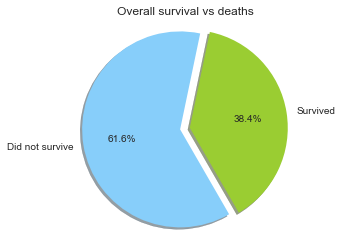

In [124]:
survival = group_by_survived.count()['Fare']
labels = 'Survived', 'Did not survive'
#sizes = [survival[1], survival[0]]
sizes = [survival['Survived'], survival['Died']]
colors = ['yellowgreen', 'lightskyblue']
explode = [0.1,0]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
       autopct = '%1.1f%%', shadow = True, startangle = 300)
plt.axis('equal')
plt.title('Overall survival vs deaths')

Looking at the above, we have an overall idea of how the data is structured, and the variables with which we can move forward in this investigation to find some link between them and the survival rate.
Just looking at the data we can classify some informations in the data frame as significant and the others as insignificant. 
The insignificant ones are:
1. Passenger id
2. Ticket
These two are good for passenger identifications, but not for any sort of classification.

The significant ones may be:
1. Age
2. Sex
3. Pclass (inter related with fare and cabin. Using all three will just be redundant)
4. Embarked
5. Parch
6. SibSp

Now, our assumptions of the above 5 variables to be significant are yet to be proven. And going forward we would be working towards finding some relation between one or more of these variables and the survival rate. We will also hope to answer some of the questions raised earlier.

### Survival by gender

The chances of survival depended first and foremost on a persons ability to board a life boat. So it is logical to think that a persons chances would depend on that person's being a women, a child, an aged person, or his/her social standing adn so on and so forth.

Lets start by looking at gender first. There is a high probability that women are given preference over men while filling life boats.

In [125]:
group_by_sex = titanic.groupby(['Survival','Sex'])
group_by_sex.describe()

Age        Fare       Parch  PassengerId  \
Survival Sex                                                             
Died     female count   64.000000   81.000000   81.000000    81.000000   
                mean    25.046875   23.024385    1.037037   434.851852   
                std     13.618591   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                25%     16.750000    8.850000    0.000000   206.000000   
                50%     24.500000   15.245800    0.000000   420.000000   
                75%     33.250000   27.900000    2.000000   643.000000   
                max     57.000000  151.550000    6.000000   889.000000   
         male   count  360.000000  468.000000  468.000000   468.000000   
                mean    31.618056   21.960993    0.207265   449.121795   
                std     14.056019   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                25%     21.750000    7.795800    0.000000   212.500000   
                50%     29.000000    9.416650    0.000000   461.000000   
                75%     39.250000   26.000000    0.000000   678.500000   
                max     74.000000  263.000000    5.000000   891.000000   
Survived female count  197.000000  233.000000  233.000000   233.000000   
                mean    28.847716   51.938573    0.515021   429.699571   
                std     14.175073   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                25%     19.000000   13.000000    0.000000   238.000000   
                50%     28.000000   26.000000    0.000000   400.000000   
                75%     38.000000   76.291700    1.000000   636.000000   
                max     63.000000  512.329200    5.000000   888.000000   
         male   count   93.000000  109.000000  109.000000   109.000000   
                mean    27.276022   40.821484    0.357798   475.724771   
                std     16.504803   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                25%     18.000000    9.500000    0.000000   272.000000   
                50%     28.000000   26.287500    0.000000   508.000000   
                75%     36.000000   39.000000    1.000000   680.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  Survived  
Survival Sex                                             
Died     female count   81.000000   81.000000      81.0  
                mean     2.851852    1.209877       0.0  
                std      0.450309    1.814635       0.0  
                min      1.000000    0.000000       0.0  
                25%      3.000000    0.000000       0.0  
                50%      3.000000    1.000000       0.0  
                75%      3.000000    1.000000       0.0  
                max      3.000000    8.000000       0.0  
         male   count  468.000000  468.000000     468.0  
                mean     2.476496    0.440171       0.0  
                std      0.761411    1.138507       0.0  
                min      1.000000    0.000000       0.0  
                25%      2.000000    0.000000       0.0  
                50%      3.000000    0.000000       0.0  
                75%      3.000000    0.000000       0.0  
                max      3.000000    8.000000       0.0  
Survived female count  233.000000  233.000000     233.0  
                mean     1.918455    0.515021       1.0  
                std      0.834211    0.737533       0.0  
                min      1.000000    0.000000       1.0  
                25%      1.000000    0.000000       1.0  
                50%      2.000000    0.000000       1.0  
                75%      3.000000    1.000000       1.0  
                max      3.000000    4.000000       1.0  
     

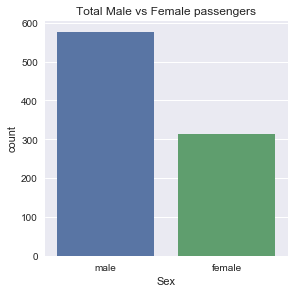

In [126]:
sns.factorplot('Sex', data = titanic, kind = 'count')
plt.title('Total Male vs Female passengers')

The number of males on board is more than the number of females. 
Let us now make the comparisons of their survival and deaths on the basis of their percentage survival or deaths.

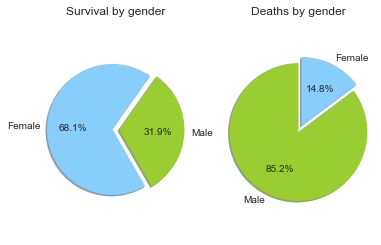

In [127]:
labels = 'Male', 'Female'
sizes = [group_by_sex.count()['Fare']['Survived']['male'], group_by_sex.count()['Fare']['Survived']['female']]
colors = ['yellowgreen', 'lightskyblue']
explode = [0.1,0]

plt.subplot(121)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
       autopct = '%1.1f%%', shadow = True, startangle = 300)
plt.axis('equal')
plt.title('Survival by gender')


plt.subplot(122)
sizes = [group_by_sex.count()['Fare']['Died']['male'], group_by_sex.count()['Fare']['Died']['female']]
plt.pie(sizes, explode = explode, labels = labels, colors = colors, 
       autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Deaths by gender')

Thus it seems our assumption about gender was correct. The survival rate of females are indeed significantly higher than that of males.

### Survival by age

Next, let us check out survival rate variance due to age. Although the mean values for age for survivals and deaths seem to be quite close, a histogram of the different ages and the survival counts are bound to give a more in depth visual representation of any hidden patterns.

In [128]:
survival_ages = titanic[titanic['Survived'] == 1]['Age'].dropna()
non_survival_ages = titanic[titanic['Survived'] == 0]['Age'].dropna()

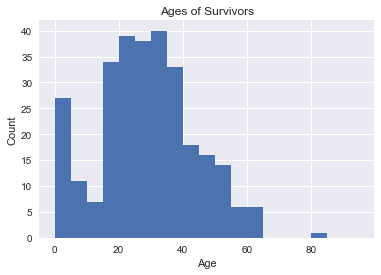

In [129]:
plt.hist(survival_ages.values, bins = np.arange(0,100,5))
plt.title('Ages of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

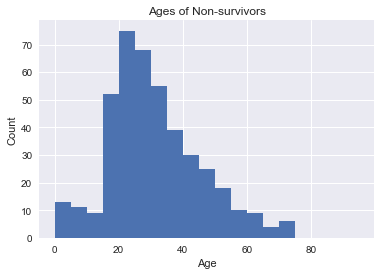

In [130]:
plt.hist(non_survival_ages.values, bins = np.arange(0,100,5))
plt.title('Ages of Non-survivors')
plt.xlabel('Age')
plt.ylabel('Count')

Not much significant patterns are visible to the naked eye from the above histograms. The only complementary pattern in the above is for the children below 5 years of age.
We find that almost a lot of children below 5 years survived and only a few died. This leads us to believe that children were given priority for boarding the life boats over others.

### Survival by Class

In [131]:
group_by_class = titanic.groupby(['Survival', 'Class'])
group_by_class.describe()

Age        Fare       Parch  PassengerId  \
Survival Class                                                                 
Died     First Class  count   64.000000   80.000000   80.000000    80.000000   
                      mean    43.695312   64.684008    0.300000   410.300000   
                      std     15.284243   60.662089    0.700813   252.655587   
                      min      2.000000    0.000000    0.000000     7.000000   
                      25%     31.000000   27.742700    0.000000   174.000000   
                      50%     45.250000   44.750000    0.000000   437.000000   
                      75%     55.250000   78.937500    0.000000   608.750000   
                      max     71.000000  263.000000    4.000000   873.000000   
         Second Class count   90.000000   97.000000   97.000000    97.000000   
                      mean    33.544444   19.412328    0.144330   452.123711   
                      std     12.151581   15.307175    0.432765   257.771065   
                      min     16.000000    0.000000    0.000000    21.000000   
                      25%     25.000000   11.500000    0.000000   229.000000   
                      50%     30.500000   13.000000    0.000000   414.000000   
                      75%     39.000000   26.000000    0.000000   686.000000   
                      max     70.000000   73.500000    2.000000   887.000000   
         Third Class  count  270.000000  372.000000  372.000000   372.000000   
                      mean    26.555556   13.669364    0.384409   453.580645   
                      std     12.334882   12.118338    0.914144   263.090509   
                      min      1.000000    0.000000    0.000000     1.000000   
                      25%     19.000000    7.750000    0.000000   206.750000   
                      50%     25.000000    8.050000    0.000000   470.000000   
                      75%     33.000000   15.136450    0.000000   679.500000   
                      max     74.000000   69.550000    6.000000   891.000000   
Survived First Class  count  122.000000  136.000000  136.000000   136.000000   
                      mean    35.368197   95.608029    0.389706   491.772059   
                      std     13.760017   85.286820    0.690387   239.006988   
                      min      0.920000   25.929200    0.000000     2.000000   
                      25%     24.250000   50.985450    0.000000   307.750000   
                      50%     35.000000   77.958300    0.000000   510.500000   
                      75%     45.000000  111.481225    1.000000   693.500000   
                      max     80.000000  512.329200    2.000000   890.000000   
         Second Class count   83.000000   87.000000   87.000000    87.000000   
                      mean    25.901566   22.055700    0.643678   439.080460   
                      std     14.837787   10.853502    0.820904   244.211937   
                      min      0.670000   10.500000    0.000000    10.000000   
                      25%     17.500000   13.000000    0.000000   254.000000   
                      50%     28.000000   21.000000    0.000000   441.000000   
                      75%     34.000000   26.250000    1.000000   612.500000   
                      max     62.000000   65.000000    3.000000   881.000000   
         Third Class  count   85.000000  119.000000  119.000000   119.000000   
                      mean    20.646118   13.694887    0.420168   394.058824   
                      std     11.995047   10.692993    0.807757   264.680245   
                      min      0.420000    0.000000    0.000000     3.000000   
                      25%     14.000000    7.775000    0.000000   169.500000   
                      50%     22.000000    8.516700    0.000000   359.000000   
                      75%     29.000000   15.875000    1.000000   633.500000   
                      max     63.000000   56.495800    5.000000   876.000000   

                             Pclass

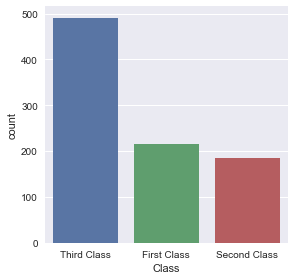

In [132]:
sns.factorplot('Class', data = titanic, kind = 'count')

So most of the passengers belong to class 3, while the number of passengers for class 2 and 1 are comparable.
How do their survival percentages compare?

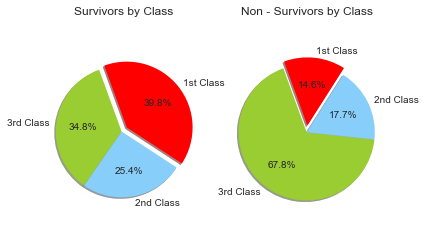

In [133]:
plt.subplot(121)
labels = '3rd Class', '2nd Class', '1st Class'
sizes = [group_by_class.count()['Fare']['Survived']['Third Class'], 
         group_by_class.count()['Fare']['Survived']['Second Class'], 
         group_by_class.count()['Fare']['Survived']['First Class']]
colors = ['yellowgreen', 'lightskyblue', 'red']
explode = [0, 0, 0.1]
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       autopct = '%1.1f%%', shadow = True, startangle = 110)
plt.axis('equal')
plt.title('Survivors by Class')

plt.subplot(122)
sizes = [group_by_class.count()['Fare']['Died']['Third Class'], 
         group_by_class.count()['Fare']['Died']['Second Class'], 
         group_by_class.count()['Fare']['Died']['First Class']]
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       autopct = '%1.1f%%', shadow = True, startangle = 110)
plt.axis('equal')
plt.title('Non - Survivors by Class')

In [134]:
group_by_class.count()['Fare']

Survival  Class       
Died      First Class      80
          Second Class     97
          Third Class     372
Survived  First Class     136
          Second Class     87
          Third Class     119
Name: Fare, dtype: int64

In [135]:
print('Percentage of survivals in class 1: {}'.format(group_by_class.count()['Fare']['Survived']['First Class']
    /(group_by_class.count()['Fare']['Survived']['First Class']+group_by_class.count()['Fare']['Died']['First Class'])))
print('Percentage of survivals in class 2: {}'.format(group_by_class.count()['Fare']['Survived']['Second Class']
    /(group_by_class.count()['Fare']['Survived']['Second Class']+group_by_class.count()['Fare']['Died']['Second Class'])))
print('Percentage of survivals in class 3: {}'.format(group_by_class.count()['Fare']['Survived']['Third Class']
      /(group_by_class.count()['Fare']['Survived']['Third Class']+group_by_class.count()['Fare']['Died']['Third Class'])))

Percentage of survivals in class 1: 0.6296296296296297
Percentage of survivals in class 2: 0.47282608695652173
Percentage of survivals in class 3: 0.24236252545824846


Thus, we do find a positive correlation between the ticket class and survival. Almost 63% of class 1 passengers were able to survive while only 47% of class 2 survived and an even lower percentage of class 3 survived. This proves the fact that the passengers were given priority over boarding of the life boats according to their class of tickets.

Since the number of passengers in class 3 were much more than the other two classes, yet had the lowest rate of survival, it means that most number of people died from class 3.

### By port of Embarkment

We will now see if there are any correlation between the port of embarkment and survival rate.
It is to be noted that the ports are named as C, Q, S in the data seta and their actual names are as follows:

1. C - Cherbourg
2. Q - Queenstown
3. S - Southampton

Lets rename the ports for a better visibility.

In [136]:
#embarked = pd.Categorical(titanic['Embarked'])
#embarked = embarked.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'])
#titanic_renamed['Embarked'] = embarked
#titanic['Embarked'] = embarked
titanic['Port'] = titanic.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [137]:
group_by_port = titanic.groupby(['Survival', 'Port'])
group_by_port.describe()

Age        Fare       Parch  PassengerId  \
Survival Port                                                                 
Died     Cherbourg   count   51.000000   75.000000   75.000000    75.000000   
                     mean    33.666667   35.443335    0.253333   409.853333   
                     std     14.990553   49.617218    0.547558   264.222556   
                     min      9.000000    4.012500    0.000000    27.000000   
                     25%     23.750000    7.229200    0.000000   148.500000   
                     50%     30.000000   14.458300    0.000000   378.000000   
                     75%     42.500000   32.675000    0.000000   610.000000   
                     max     71.000000  247.520800    2.000000   860.000000   
         Queenstown  count   20.000000   47.000000   47.000000    47.000000   
                     mean    30.325000   13.335904    0.276596   480.404255   
                     std     19.212986   13.550636    0.826257   253.273495   
                     min      2.000000    6.750000    0.000000     6.000000   
                     25%     18.750000    7.750000    0.000000   263.000000   
                     50%     30.750000    7.750000    0.000000   503.000000   
                     75%     40.125000   15.500000    0.000000   692.500000   
                     max     70.500000   90.000000    5.000000   891.000000   
         Southampton count  353.000000  427.000000  427.000000   427.000000   
                     mean    30.203966   20.743987    0.348946   449.868852   
                     std     13.711031   27.896824    0.862640   260.692004   
                     min      1.000000    0.000000    0.000000     1.000000   
                     25%     21.000000    7.895800    0.000000   216.000000   
                     50%     28.000000   10.500000    0.000000   455.000000   
                     75%     39.000000   26.000000    0.000000   676.500000   
                     max     74.000000  263.000000    6.000000   889.000000   
Survived Cherbourg   count   79.000000   93.000000   93.000000    93.000000   
                     mean    28.973671   79.720926    0.451613   473.989247   
                     std     15.530733   99.582717    0.730041   253.344348   
                     min      0.420000    7.225000    0.000000     2.000000   
                     25%     18.500000   19.258300    0.000000   307.000000   
                     50%     27.000000   56.929200    0.000000   485.000000   
                     75%     39.500000   89.104200    1.000000   680.000000   
                     max     60.000000  512.329200    3.000000   890.000000   
         Queenstown  count    8.000000   30.000000   30.000000    30.000000   
                     mean    22.500000   13.182227    0.000000   319.966667   
                     std      7.191265   15.371167    0.000000   224.947424   
                     min     15.000000    7.733300    0.000000    23.000000   
                     25%     16.000000    7.750000    0.000000   164.500000   
                     50%     20.500000    7.808350    0.000000   301.500000   
                     75%     29.250000   12.350000    0.000000   402.000000   
                     max     33.000000   90.000000    0.000000   829.000000   
         Southampton count  201.000000  217.000000  217.000000   217.000000   
                     mean    28.113184   39.547081    0.539171   448.857143   
                     std     14.812722   45.427680    0.821914   249.991764   
                     min      0.670000    0.000000    0.000000     3.000000   
                     25%     19.000000   12.650000    0.000000   249.000000   
                     50%     28.000000   26.000000    0.000000   445.000000   
                     75%     36.000000   52.000000    1.000000   665.000000   
                     max     80.000000  263.000000    5.000000   888.000000   

                                Pclass       SibSp  Survived  
Survival Port        

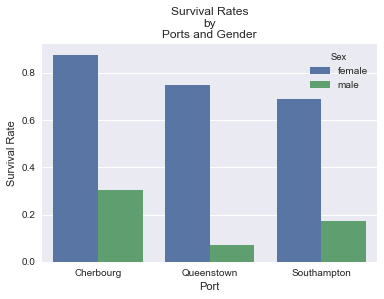

In [138]:
#sns.factorplot('Embarked', data = titanic, kind = 'count', hue = 'Survival')
group_port_gender = titanic.groupby(['Port', 'Sex'])['Survived'].mean().reset_index()
sns.barplot(data = group_port_gender, x = 'Port', y = 'Survived', hue = 'Sex')
plt.ylabel('Survival Rate')
#plt.title('Survival Rates\bby\bPorts and Gender')
plt.title('Survival Rates\nby\nPorts and Gender')

So, there seems to be something going on in terms of the port of embarkment, since the survival rate for port C and port Q are much higher than that of port S.
But it is strange that just the port of embarkment can have any significance on the survival of a person. Lets dig a little deeper.

In [139]:
group_port_sex = titanic.groupby(['Survival', 'Port', 'Sex'])
group_port_sex.count()['Pclass']

Survival  Port         Sex   
Died      Cherbourg    female      9
                       male       66
          Queenstown   female      9
                       male       38
          Southampton  female     63
                       male      364
Survived  Cherbourg    female     64
                       male       29
          Queenstown   female     27
                       male        3
          Southampton  female    140
                       male       77
Name: Pclass, dtype: int64

We further subdivide the groups based on their gender. Since we have already found that gender seems to be a contributing factor on survival, it is a valid assumption that maybe, ports where more female passengers boarded had a higher rate of survival than other. 
To prove this, lets look at some percentages of survival and ratio of women to men.

In [140]:
men = group_port_sex.count()['Pclass']['Died']['Cherbourg']['male']+group_port_sex.count()['Pclass']['Survived']['Cherbourg']['male']
women = group_port_sex.count()['Pclass']['Died']['Cherbourg']['female']+group_port_sex.count()['Pclass']['Survived']['Cherbourg']['female']
c = group_by_port.count()['Pclass']['Survived']['Cherbourg']/(group_by_port.count()['Pclass']['Died']['Cherbourg']+group_by_port.count()['Pclass']['Survived']['Cherbourg'])
ratio_c = women/men
print('Total women in Cherbourg: {}'.format(women))
print('Total men in Cherbourg: {}'.format(men))
print('Ratio women/men in Cherbourg: {}'.format(women/men))
print('Survival rate : {}'.format(c))

Total women in Cherbourg: 73
Total men in Cherbourg: 95
Ratio women/men in Cherbourg: 0.7684210526315789
Survival rate : 0.5535714285714286


In [141]:
men = group_port_sex.count()['Pclass']['Died']['Queenstown']['male']+group_port_sex.count()['Pclass']['Survived']['Queenstown']['male']
women = group_port_sex.count()['Pclass']['Died']['Queenstown']['female']+group_port_sex.count()['Pclass']['Survived']['Queenstown']['female']
q = group_by_port.count()['Pclass']['Survived']['Queenstown']/(group_by_port.count()['Pclass']['Died']['Queenstown']+group_by_port.count()['Pclass']['Survived'][1])
ratio_q = women/men
print('Total women in Queenstown: {}'.format(women))
print('Total men in Queenstown: {}'.format(men))
print('Ratio women/men in Queenstown: {}'.format(women/men))
print('Survival rate : {}'.format(q))

Total women in Queenstown: 36
Total men in Queenstown: 41
Ratio women/men in Queenstown: 0.8780487804878049
Survival rate : 0.38961038961038963


In [142]:
men = group_port_sex.count()['Pclass']['Died']['Southampton']['male']+group_port_sex.count()['Pclass']['Survived']['Southampton']['male']
women = group_port_sex.count()['Pclass']['Died']['Southampton']['female']+group_port_sex.count()['Pclass']['Survived']['Southampton']['female']
s = group_by_port.count()['Pclass']['Survived']['Southampton']/(group_by_port.count()['Pclass']['Died']['Southampton']+group_by_port.count()['Pclass']['Survived']['Southampton'])
ratio_s = women/men
print('Total women in Southampton: {}'.format(women))
print('Total men in Southampton: {}'.format(men))
print('ratio women/men in Southampton: {}'.format(women/men))
print('Survival rate : {}'.format(s))

Total women in Southampton: 203
Total men in Southampton: 441
ratio women/men in Southampton: 0.4603174603174603
Survival rate : 0.33695652173913043


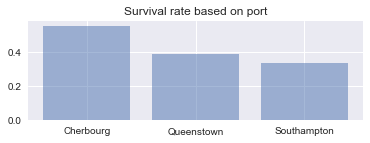

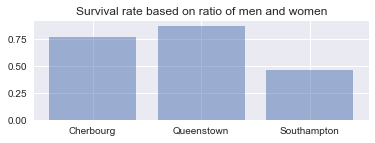

In [143]:
objects = ('Cherbourg', 'Queenstown', 'Southampton')
y_pos = np.arange(len(objects))
values = [c, q, s]
plt.subplot(211)
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Survival rate based on port')
plt.show()

objects = ('Cherbourg', 'Queenstown', 'Southampton')
values = [ratio_c, ratio_q, ratio_s]
plt.subplot(212)
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Survival rate based on ratio of men and women')
plt.show()

For two ports this seems to correlate. Both Chebourg and Southampton seem to have a comparable rate of survival with their rate of women to men. 
Cherbourg had more females boarding in that port and had the highest rate of survival. Southampton had relatively smaller ratio of female to male and has a lower rate of survival.
But what breaks the pattern is the port of Queenstown.
We are forced to think that maybe our assumption is some what mistaken, though logically it makes sense, and has also been proven with single variables.
This brings us to another hypothesis that the only contributing factor that can trump a females chances of survival over a man is the passenger's class.
Thus lets take a look at the passenger classes for Queenstown port.

In [144]:
group_port_sex = titanic.groupby(['Port', 'Class'])
group_port_sex.count()['Name']

Port         Class       
Cherbourg    First Class      85
             Second Class     17
             Third Class      66
Queenstown   First Class       2
             Second Class      3
             Third Class      72
Southampton  First Class     127
             Second Class    164
             Third Class     353
Name: Name, dtype: int64

In [145]:
class1 = group_port_sex.count()['Name']['Queenstown']['First Class']
total = group_port_sex.count()['Name']['Queenstown']['First Class'] + group_port_sex.count()['Name']['Queenstown']['Second Class'] + group_port_sex.count()['Name']['Queenstown']['Third Class']
print('Class 1 percentage: {}'.format(class1/total))

class2 = group_port_sex.count()['Name']['Queenstown']['Second Class']
print('Class 2 percentage: {}'.format(class2/total))

class3 = group_port_sex.count()['Name']['Queenstown']['Third Class']
print('Class 3 percentage: {}'.format(class3/total))

Class 1 percentage: 0.025974025974025976
Class 2 percentage: 0.03896103896103896
Class 3 percentage: 0.935064935064935


And what do we find? The percentage of people in the 1st or 2nd class boarding at the port of Queenstown is infinitesimal. And thus the higher ratio of women to men fails to provide a higher survival ratio for this port.

### CONCLUSION

There were some important findings and some revelations that we were able to uncover in the course of this project.
There were also some drawbacks, beginning with incomplete data and our inability to use machine learning algorithms.

To summarise the findings, we could point out the following:
1. Gender plays a significant role in a passengers survival. Females have a generally higher survival rate when compared to males.
2. Age, though not a significantly contributing factor, becomes one for small children, especially under the age of 5. Children under 5 yrs of age have a significantly higher chances of survival when compared to people of all other age groups.
3. Passenger class has a very significant part in survival. Passengers of higher class (class 1), has a much higher chance of survival than the other two classes.
4. Port of embarkment gives some interesting results but only when broken down to the sex and passenger classes of the passengers embarking from that port. However one interesting feature discovered in this endeavour is that passenger sex is trumped by passenger class with respect to survival. That is, a passenger irrespective of their gender will have a higher chance of survival if they belong to a higher class.

In terms of drawbacks it is to be noted that the data is far from complete. This is not the full data set, and only consists of the data of passengers, not of crews. Also the age data is rounded and missing in a lot of cases. Missing data create gaps in our understanding of the relationships. I did not use any form of extrapolation to fill in the missing data, but it could have been performed.  Finally, although we have established some basic relationships between dependent and independent variables, we have no notion of their actual correlation.

### BIBLIOGRAPHY

1. Stack overflow was referred to on multiple occassions with respect to changing variable name in data frame and plotting issues.
2. https://github.com/enyeartj/udacity-dand-da-project/blob/master/p2_titanic_data.ipynb - this project was referred to for an initial idea.